# Ejercicio 9

**NOTA:** el láser se ubica sobre el centro odométrico del robot (tiene solamente una traslación en el eje z).

In [1]:
from ipynb.fs.defs.Ejercicio7 import closest_timestamps
import numpy as np
import matplotlib.pyplot as plt

Defino una función para convertir coordenadas polares a cartesianas:

In [2]:
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y

Leo los datos de odometría y barrido láser:

In [3]:
odom_file_name = "odom.txt"
odom_data = np.loadtxt(odom_file_name)

scan_file_name = "scan.txt"
scan_data = np.loadtxt(scan_file_name)

Parámetros del sensor de barrido láser:

In [4]:
min_angle = -0.75*np.pi
max_angle = 0.75*np.pi
num_beams = 540
num_scan_meas = scan_data.shape[0]

Busco las mediciones de odometría más cercanas temporalmente a las mediciones láser usando la función definida en el Ejercicio 7.

In [5]:
matching_idxs = closest_timestamps(odom_data[:,0], scan_data[:,0])
odom_matched = odom_data[matching_idxs]

Construyo un arreglo que contiene el ángulo de medición para cada beam:

In [6]:
theta = np.linspace(min_angle, max_angle, num_beams)

Convierto las mediciones láser al sistema de coordenadas de odometría. Para esto primero paso las mediciones láser de coordenadas polares a coordenadas cartesianas. Luego, de la medición de odometría más cercana en el tiempo obtengo una orientación R y una posición odométrica p_od. Para cada beam roto la medición (expresada ya en coordenadas cartesianas) usando R y sumo la traslación p_od. Esto se hace para cada barrido láser.

In [7]:
x_coord_laser = []
y_coord_laser = []
for i in range(num_scan_meas):
    odom_meas = odom_matched[i] # odom_meas = (timestamp, x, y, th, lin_vel, ang_vel)
    orientation = odom_meas[3]
    xs, ys = polar_to_cartesian(scan_data[i,1:], theta)
    c, s = np.cos(orientation), np.sin(orientation)
    
    for j in range(num_beams):
        if(np.isinf(xs[j]) or np.isinf(ys[j])):
            continue
        # Convert (xs[j], ys[j]) to odom frame
        x_ = c * xs[j] - s * ys[j] + odom_meas[1]
        y_ = s * xs[j] + c * ys[j] + odom_meas[2]
        x_coord_laser.append(x_)
        y_coord_laser.append(y_)
 

Ahora que tengo toda la información en el mismo sistema de coordenadas, puedo graficar los puntos obtenidos (los mismos resultan en un mapa del entorno) junto al camino realizado por el robot durante el tiempo de simulación.

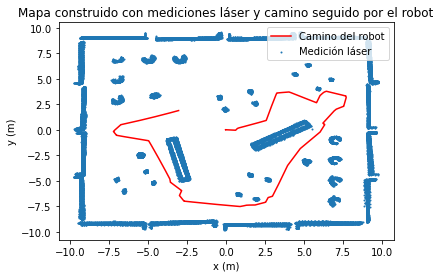

In [8]:
plt.scatter(x_coord_laser, y_coord_laser, s=1, label='Medición láser')
plt.plot(odom_data[:,1], odom_data[:,2], color='r', label='Camino del robot')
plt.title('Mapa construido con mediciones láser y camino seguido por el robot')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(loc='upper right')
plt.show()   